# KMeans

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn import preprocessing, cross_validation
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('movement_libras.csv', header=None)
df.head()

0        1        2        3        4        5        6        7   \
0  0.79691  0.38194  0.79691  0.37731  0.79884  0.37731  0.79497  0.37731   
1  0.67892  0.27315  0.68085  0.27315  0.68085  0.27315  0.68085  0.27315   
2  0.72147  0.23611  0.72340  0.23611  0.72340  0.23611  0.72340  0.23611   
3  0.56480  0.32407  0.56286  0.32407  0.56093  0.32407  0.55899  0.32407   
4  0.67118  0.38426  0.67118  0.38657  0.67311  0.38657  0.67311  0.38426   

        8        9  ...       81       82       83       84       85       86  \
0  0.77563  0.35417 ...  0.51389  0.39845  0.42593  0.47389  0.36111  0.55899   
1  0.67892  0.26852 ...  0.57407  0.17795  0.63657  0.17215  0.67361  0.17021   
2  0.72340  0.23611 ...  0.30556  0.59768  0.25926  0.67118  0.25231  0.73501   
3  0.55899  0.32407 ...  0.49074  0.26306  0.42361  0.33269  0.34722  0.41006   
4  0.67311  0.37963 ...  0.76389  0.44101  0.64120  0.45068  0.54167  0.47776   

        87       88       89  90  
0  0.31250  0.63830  0.29398   1  
1  0.69213  0.17215  0.69213   1  
2  0.26620  0.78143  0.27778   1  
3  0.28009  0.49130  0.24306   1  
4  0.44213  0.53191  0.34259   1  

[5 rows x 91 columns]

Data Set Information:

http://archive.ics.uci.edu/ml/datasets/Libras+Movement

The dataset (movement_libras) contains 15 classes of 24 instances each, where each class references to a hand movement type in LIBRAS.

In the video pre-processing, a time normalization is carried out selecting 45 frames from each video, in according
to an uniform distribution. In each frame, the centroid pixels of the segmented objects (the hand) are found, which
compose the discrete version of the curve F with 45 points. All curves are normalized in the unitary space.

In order to prepare these movements to be analysed by algorithms, we have carried out a mapping operation, that is, each
curve F is mapped in a representation with 90 features, with representing the coordinates of movement.

Some sub-datasets are offered in order to support comparisons of results.

Attribute Information:

90 numeric (double) and 1 for the class (integer)

In [3]:
X = np.array(df.drop(90, axis=1))
X = preprocessing.scale(X)
y = np.array(df[90])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [4]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
predictions = kmeans.predict(X_test)
score = accuracy_score(y_test, predictions)
print(score)

0.0138888888889


# My implementation of KMeans

In [6]:
class MyKMeans:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.centroids = []
        self.labels = []
        
    def fit(self, X):
        closest, centroids = self.optimize(X)
        self.costs = [self.cost_function(X, closest, centroids)]
        prev_cost = self.costs[0]
        for i in range(100):
            closest, centroids = self.optimize(X)
            cost = self.cost_function(X, closest, centroids)
            if prev_cost >= cost:
                self.costs.append(cost)
                prev_cost = cost
                self.centroids = centroids
                self.labels = closest
                
    def predict(self, X):
        return self.closest_centroid(X, self.centroids)
                    
    def get_labels(self):
        return np.array(self.labels)
    
    def get_centroids(self):
        return np.array(self.centroids)
    
    def get_cost(self):
        return np.array(self.costs)
    
    def initialize_centroids(self, X):
        X_copy = X.copy()
        np.random.shuffle(X_copy)
        return X_copy[:self.n_clusters]
    
    def optimize(self, X):
        centroids = self.initialize_centroids(X) # get random cendroids
        closest = self.closest_centroid(X, centroids) # get labels for points
        centroids = self.move_centroids(X, closest, centroids) # get cool cendroids
        return closest, centroids
    
    def cost_function(self, X, closest, centroids):
        cost = 0
        for x, cluster in list(zip(X, closest)):
            cost += np.linalg.norm(x - centroids[cluster])
        cost /= len(X)
        return cost

    def closest_centroid(self, X, centroids):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def move_centroids(self, X, closest, centroids):
        return np.array([X[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [7]:
my_kmeans = MyKMeans(n_clusters=15)
my_kmeans.fit(X_train)

predictions1 = my_kmeans.predict(X_test)
score1 = accuracy_score(y_test, predictions1)
print(score1)

0.0138888888889


# An easier example to prove that It works

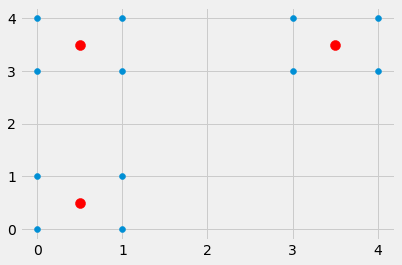

In [8]:
points = np.array([[0, 0], [1, 1], [1, 0], [0, 1], [0.5, 0.5], 
                   [3, 3], [4, 4], [4, 3], [3, 4], [3.5, 3.5],
                   [0, 3], [1, 4], [0, 4], [1, 3], [0.5, 3.5]])

my_kmeans1 = MyKMeans(n_clusters=3)
my_kmeans1.fit(points)
centroids = my_kmeans1.get_centroids()

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)